# `centroid_map`


Starts with running `grow_from_max`, it then computes the centorid of each cell, and then uses that centroid to seed the tesselation.  This process is repeated `numiter` times.

> **REF** There is an IEEE article I got the algorithm from which also includes a derivation of proof that this 
> algorithm will eventually converge.  I need to relocate the article to provide proper attribution.



In [1]:
ciaover 
echo Today is `date`

CIAO 4.11 Wednesday, December  5, 2018
  bindir      : /export/ciao-4.11/bin
  CALDB       : 4.8.2
Today is Wed Jan 23 08:39:55 EST 2019


In [2]:
source display_map.sh

In [3]:
#/bin/rm -rf ./tmp
#mkdir ./tmp
ASCDS_WORK_PATH=`pwd`/tmp

## Example 


In [4]:
centroid_map img.psf_asm centroid.map numiter=30 clob+

centroid_map
          infile = img.psf_asm
         outfile = centroid.map
         numiter = 30
        sitefile = 
         verbose = 1
         clobber = yes
            mode = ql



In [6]:
dmmaskbin img.psf_asm mask=centroid.map out=centroid.img clob+

In [7]:
### map2reg centroid.map centroid.reg

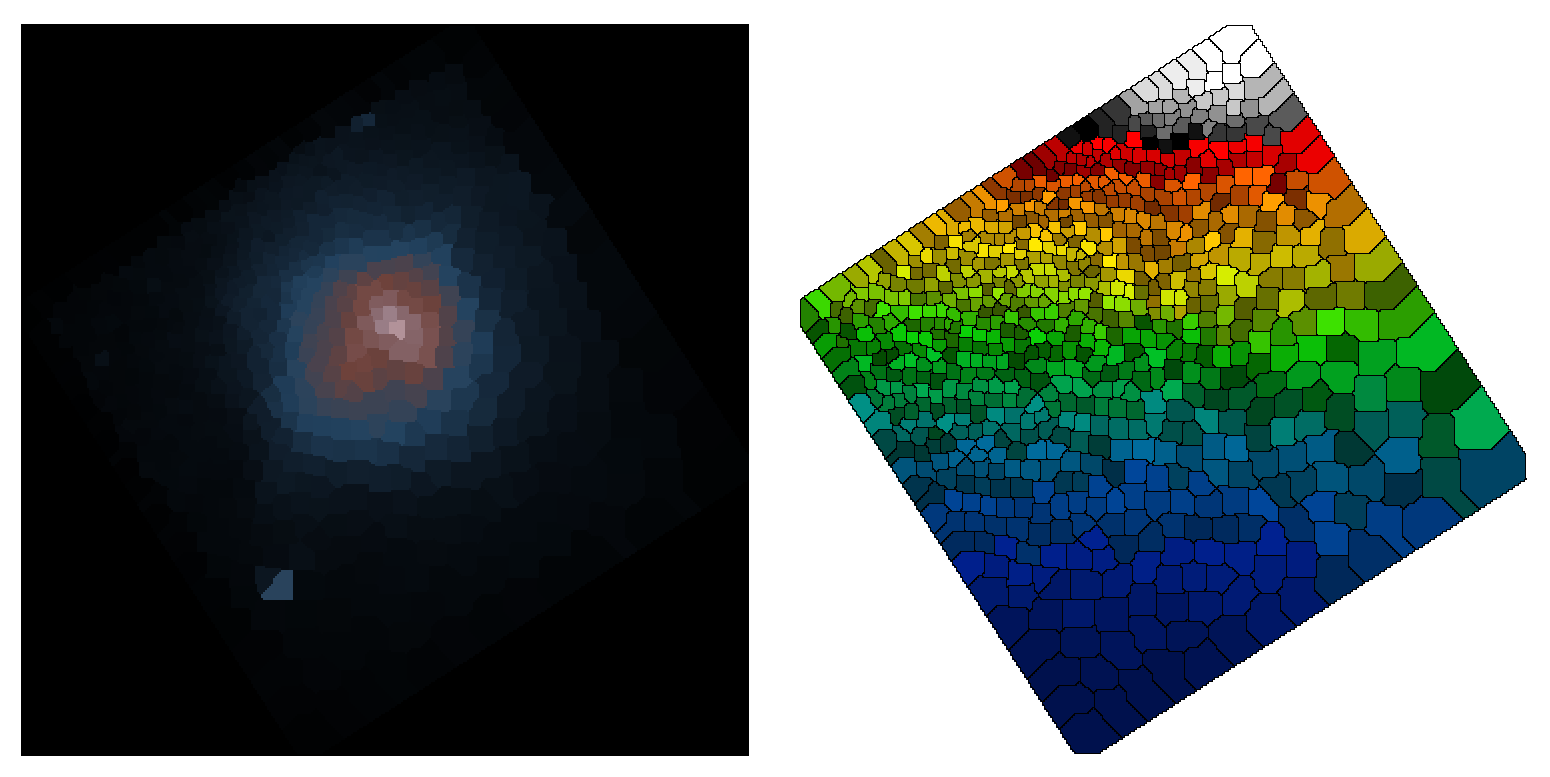

In [8]:
display_map centroid.img centroid.map centroid.png centroid.reg

The `centroid_map` algorithm tends to evenly space out the cells in areas of uniform (or smoothly varying) flux.  The cells become more dense in areas with large changes in pixel values.


Mathematically, it can be shown that this algorithm will converge (ie the centroids will stop shifting).  **REF** from IEEE I can't find right now.  However, it convers slowly.  Most of the significant centroid shifts happen in a reasonable number of iterations.  Setting the number of iterations in the $30-150$ range are reasonable.